In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests

In [2]:
r = requests.get("https://raw.githubusercontent.com/jbrownlee/Datasets/master/wheat-seeds.csv")

with open("seeds_dataset.csv", "wb") as fopen:
    fopen.write(r.content)

In [3]:
df = pd.read_csv("seeds_dataset.csv", header=None)
df

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [4]:
df.columns = ["Area", "Perimeter", "Compactness", "KernelLength", "KernelWidth", "AsymmetryCoef", "KernelGroove",
              "Type"]
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'KernelLength', 'KernelWidth',
       'AsymmetryCoef', 'KernelGroove', 'Type'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           210 non-null    float64
 1   Perimeter      210 non-null    float64
 2   Compactness    210 non-null    float64
 3   KernelLength   210 non-null    float64
 4   KernelWidth    210 non-null    float64
 5   AsymmetryCoef  210 non-null    float64
 6   KernelGroove   210 non-null    float64
 7   Type           210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [6]:
df[df.duplicated()]

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoef,KernelGroove,Type


<AxesSubplot:xlabel='Type', ylabel='count'>

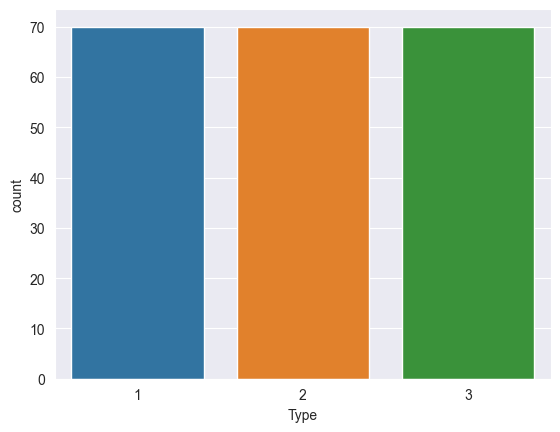

In [7]:
sns.countplot(data=df, x="Type")

<AxesSubplot:>

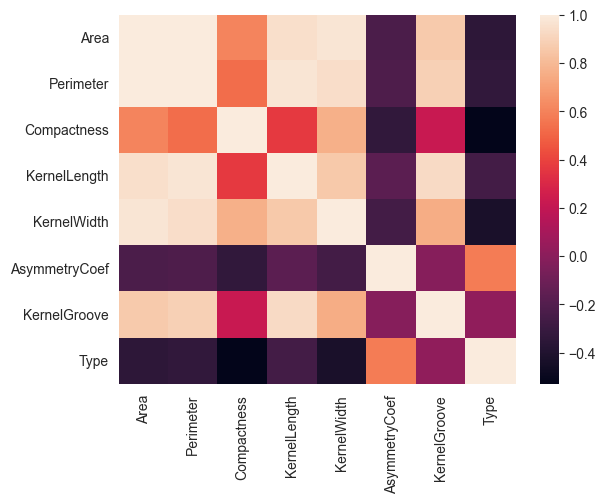

In [8]:
sns.heatmap(df.corr())

In [9]:
from matplotlib import pyplot as plt

<AxesSubplot:>

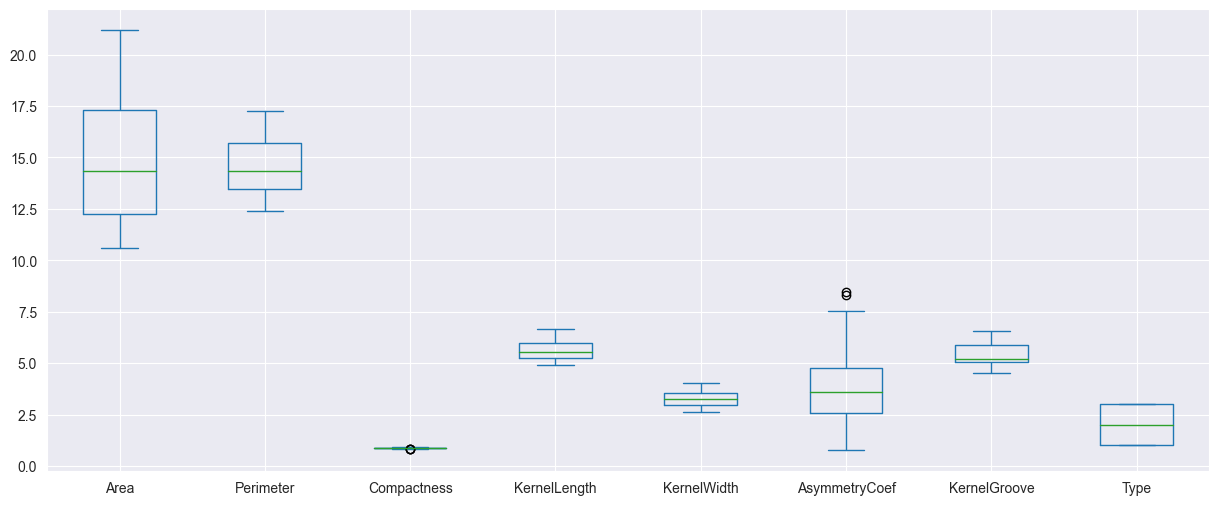

In [10]:
df.plot(kind="box", figsize=(15, 6))

<AxesSubplot:xlabel='AsymmetryCoef'>

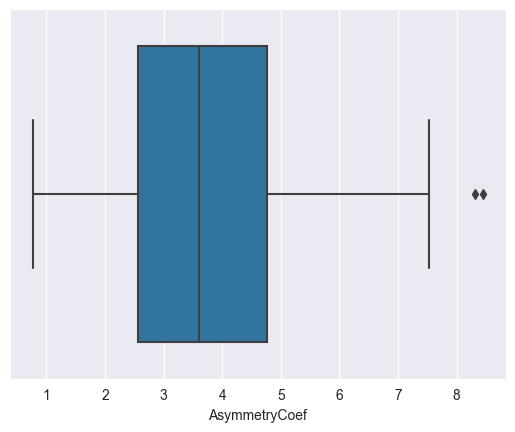

In [11]:
sns.boxplot(data=df, x="AsymmetryCoef")

In [12]:
df = df.loc[df.AsymmetryCoef < 8]
df

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoef,KernelGroove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001,3
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [13]:
x = df.drop("Type", axis=1)
y = df.copy().Type

display(x)
display(y)

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoef,KernelGroove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


0      1
1      1
2      1
3      1
4      1
      ..
204    3
205    3
206    3
208    3
209    3
Name: Type, Length: 208, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score, confusion_matrix, roc_auc_score, roc_curve, classification_report

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)
display(x_train)
display(x_test)
display(y_train)
display(y_test)

,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoef,KernelGroove
86,18.88,16.26,0.8969,6.084,3.764,1.649,6.109
204,12.37,13.47,0.8567,5.204,2.960,3.919,5.001
67,14.01,14.29,0.8625,5.609,3.158,2.217,5.132
82,20.20,16.89,0.8894,6.285,3.864,5.173,6.187
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
...,...,...,...,...,...,...,...
106,18.85,16.17,0.9056,6.152,3.806,2.843,6.200
14,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
92,18.81,16.29,0.8906,6.272,3.693,3.237,6.053
179,12.21,13.47,0.8453,5.357,2.893,1.661,5.178


,Area,Perimeter,Compactness,KernelLength,KernelWidth,AsymmetryCoef,KernelGroove
161,12.02,13.33,0.8503,5.350,2.810,4.2710,5.308
15,14.59,14.28,0.8993,5.351,3.333,4.1850,4.781
73,19.11,16.26,0.9081,6.154,3.930,2.9360,6.079
96,19.31,16.59,0.8815,6.341,3.810,3.4770,6.238
166,12.44,13.59,0.8462,5.319,2.897,4.9240,5.270
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533
100,16.41,15.25,0.8866,5.718,3.525,4.2170,5.618
135,15.38,14.66,0.8990,5.477,3.465,3.6000,5.439
18,14.70,14.21,0.9153,5.205,3.466,1.7670,4.649
148,12.70,13.71,0.8491,5.386,2.911,3.2600,5.316


86     2
204    3
67     1
82     2
206    3
      ..
106    2
14     1
92     2
179    3
102    2
Name: Type, Length: 166, dtype: int64

161    3
15     1
73     2
96     2
166    3
9      1
100    2
135    2
18     1
148    3
171    3
30     1
155    3
180    3
125    2
197    3
164    3
190    3
84     2
75     2
124    2
170    3
104    2
101    2
69     1
25     1
95     2
16     1
141    3
185    3
154    3
68     1
66     1
120    2
147    3
98     2
138    2
167    3
45     1
113    2
65     1
178    3
Name: Type, dtype: int64

In [16]:
clf = GradientBoostingClassifier(max_depth=4, min_samples_split=35, min_samples_leaf=45, subsample=.7,
                                 learning_rate=.06, n_estimators=400)
clf

GradientBoostingClassifier(learning_rate=0.06, max_depth=4, min_samples_leaf=45,
                           min_samples_split=35, n_estimators=400,
                           subsample=0.7)

In [17]:
clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.06, max_depth=4, min_samples_leaf=45,
                           min_samples_split=35, n_estimators=400,
                           subsample=0.7)

In [18]:
print("x - y score: %.10f\nx training - y training score: %.10f\nx testing - y testing score: %.10f" % (
    clf.score(x, y), clf.score(x_train, y_train), clf.score(x_test, y_test)))

x - y score: 0.9759615385
x training - y training score: 0.9939759036
x testing - y testing score: 0.9047619048


In [19]:
y_pred = clf.predict(x_test)
y_pred

array([3, 1, 2, 2, 3, 2, 2, 1, 1, 3, 3, 1, 3, 3, 2, 3, 3, 3, 2, 2, 1, 3,
       2, 2, 3, 1, 2, 1, 3, 3, 3, 1, 1, 2, 3, 2, 2, 3, 1, 2, 1, 3],
      dtype=int64)

In [20]:
pd.DataFrame({"actual": y_test, "predicted": y_pred})

,actual,predicted
161,3,3
15,1,1
73,2,2
96,2,2
166,3,3
9,1,2
100,2,2
135,2,1
18,1,1
148,3,3


In [21]:
from sklearn.metrics import r2_score, confusion_matrix, classification_report, roc_auc_score

In [22]:
r2_score(y_test, y_pred)

0.7348963029756537

<AxesSubplot:>

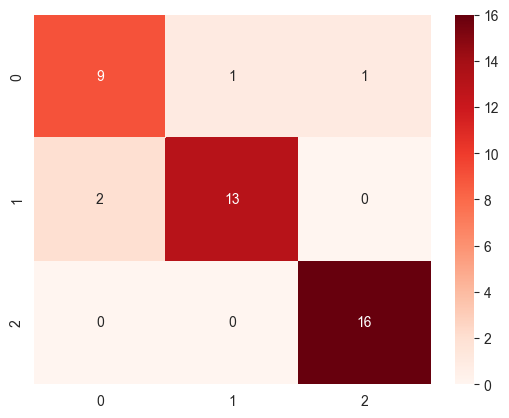

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds")

In [24]:
y_proba = clf.predict_proba(x_test)
y_proba

array([[1.35640477e-03, 2.79534246e-06, 9.98640800e-01],
       [9.88320870e-01, 5.20689573e-05, 1.16270609e-02],
       [4.95204539e-02, 9.50383660e-01, 9.58858153e-05],
       [8.14249738e-03, 9.91637941e-01, 2.19561300e-04],
       [1.28736528e-03, 2.41720930e-06, 9.98710218e-01],
       [9.48354114e-02, 9.05000126e-01, 1.64462549e-04],
       [2.74610128e-02, 9.69387378e-01, 3.15160899e-03],
       [9.75487006e-01, 4.06566050e-03, 2.04473334e-02],
       [9.99784663e-01, 1.16046699e-05, 2.03732509e-04],
       [2.22367165e-02, 7.61744159e-05, 9.77687109e-01],
       [1.32941059e-02, 7.99595442e-06, 9.86697898e-01],
       [9.92779468e-01, 2.89463671e-05, 7.19158528e-03],
       [1.63496836e-03, 2.41636799e-06, 9.98362615e-01],
       [1.32941059e-02, 7.99595442e-06, 9.86697898e-01],
       [7.34259443e-03, 9.91787893e-01, 8.69513013e-04],
       [1.24858109e-01, 1.42854963e-05, 8.75127605e-01],
       [1.32941059e-02, 7.99595442e-06, 9.86697898e-01],
       [1.32941059e-02, 7.99595

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.82      0.82      0.82        11
           2       0.93      0.87      0.90        15
           3       0.94      1.00      0.97        16

    accuracy                           0.90        42
   macro avg       0.90      0.89      0.89        42
weighted avg       0.90      0.90      0.90        42



In [26]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 9,  1,  1],
       [ 2, 13,  0],
       [ 0,  0, 16]], dtype=int64)

In [29]:
FP = cm.sum(axis=0) - np.diag(cm)
FP

array([2, 1, 1], dtype=int64)

In [30]:
FN = cm.sum(axis=1) - np.diag(cm)
FN

array([2, 2, 0], dtype=int64)

In [31]:
TP = np.diag(cm)
TP

array([ 9, 13, 16], dtype=int64)

In [33]:
TN = cm.sum() - (FP + FN + TP)
TN

array([29, 26, 25], dtype=int64)

In [34]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
TPR

array([0.81818182, 0.86666667, 1.        ])

In [35]:
# Specificity or true negative rate
TNR = TN / (TN + FP)
TNR

array([0.93548387, 0.96296296, 0.96153846])

In [36]:
# Precision or positive predictive value
PPV = TP / (TP + FP)
PPV

array([0.81818182, 0.92857143, 0.94117647])

In [37]:
# Negative predictive value
NPV = TN / (TN + FN)
NPV

array([0.93548387, 0.92857143, 1.        ])

In [38]:
# Fall out or false positive rate
FPR = FP / (FP + TN)
FPR

array([0.06451613, 0.03703704, 0.03846154])

In [39]:
# False negative rate
FNR = FN / (TP + FN)
FNR

array([0.18181818, 0.13333333, 0.        ])

In [40]:
# False discovery rate
FDR = FP / (TP + FP)
FDR

array([0.18181818, 0.07142857, 0.05882353])

In [42]:
# Overall accuracy
ACC = (TP + TN) / (TP + FP + FN + TN)
ACC

array([0.9047619 , 0.92857143, 0.97619048])

In [47]:
# Misclassification rate
MIS = (FP + FN) / (TP + TN + FP + FN)
MIS

array([0.0952381 , 0.07142857, 0.02380952])